In [4]:
import pandas as pd

In [5]:
salary_data=pd.read_csv('SalaryData_Train(1).csv')

In [6]:
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import  accuracy_score,precision_score,recall_score,confusion_matrix,roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
salary_data.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [8]:
# Data Understanding

In [9]:
salary_data.shape

(30161, 14)

In [10]:
salary_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30161 entries, 0 to 30160
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            30161 non-null  int64 
 1   workclass      30161 non-null  object
 2   education      30161 non-null  object
 3   educationno    30161 non-null  int64 
 4   maritalstatus  30161 non-null  object
 5   occupation     30161 non-null  object
 6   relationship   30161 non-null  object
 7   race           30161 non-null  object
 8   sex            30161 non-null  object
 9   capitalgain    30161 non-null  int64 
 10  capitalloss    30161 non-null  int64 
 11  hoursperweek   30161 non-null  int64 
 12  native         30161 non-null  object
 13  Salary         30161 non-null  object
dtypes: int64(5), object(9)
memory usage: 3.2+ MB


In [11]:
salary_data.isnull().sum()

age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
Salary           0
dtype: int64

# Data Preparation

In [13]:
le=LabelEncoder()

In [14]:
salary_data['education']=le.fit_transform(salary_data.education)
salary_data['Salary']=le.fit_transform(salary_data.Salary)
salary_data['native']=le.fit_transform(salary_data.native)
salary_data['sex']=le.fit_transform(salary_data.sex)
salary_data['race']=le.fit_transform(salary_data.race)
salary_data['relationship']=le.fit_transform(salary_data.relationship)
salary_data['occupation']=le.fit_transform(salary_data.occupation)
salary_data['maritalstatus']=le.fit_transform(salary_data.maritalstatus)
salary_data['workclass']=le.fit_transform(salary_data.workclass)

In [16]:
scaler   = StandardScaler()
x_scaled = scaler.fit_transform(x)
x_scaled

array([[ 0.04277892,  2.93594688, -0.34982703, ..., -0.21850808,
        -0.07773541,  0.26635842],
       [ 0.88026081,  1.88764517, -0.34982703, ..., -0.21850808,
        -2.33149486,  0.26635842],
       [-0.0333558 , -0.20895825,  0.1748048 , ..., -0.21850808,
        -0.07773541,  0.26635842],
       ...,
       [ 1.48933854, -0.20895825,  0.1748048 , ..., -0.21850808,
        -0.07773541,  0.26635842],
       [-1.25151126, -0.20895825,  0.1748048 , ..., -0.21850808,
        -1.74718685,  0.26635842],
       [ 1.03253024,  0.83934346,  0.1748048 , ..., -0.21850808,
        -0.07773541,  0.26635842]])

In [17]:
x=salary_data.drop({'Salary'},axis=1)
y=salary_data.Salary

In [18]:
scaled_x_data=pd.DataFrame(x_scaled,columns=salary_data.columns.drop({'Salary'}))

# Model Building

In [19]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.20,random_state = 12,stratify = y)

In [20]:
x_train.shape,y_train.shape,x_test.shape,y_test.shape

((24128, 13), (24128,), (6033, 13), (6033,))

# Kernel - Linear
# Model Training without scaling | Model Testing | Model Evaluation¶

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size = 0.20,random_state = 12,stratify = y)

svc_classifier = SVC(kernel='linear')
svc_classifier.fit(x_train,y_train)
y_pred = svc_classifier.predict(x_test)

print("Overall Accuracy : ",round(accuracy_score(y_test,y_pred),4))
print("Precision        : ",round(precision_score(y_test,y_pred),4))
print("Recall           : ",round(recall_score(y_test,y_pred),4))
print("AUC Score        : ",round(roc_auc_score(y_test,y_pred),4))
print("Confusion Matrix :")

plt.figure(figsize = (12,10))
confu_matrix = confusion_matrix(y_test,y_pred)
sns.heatmap(data = confu_matrix,
            annot=True,
            linewidths=0.8,
            xticklabels=salary_data.columns,
            yticklabels=salary_data.columns,
            )
plt.xlabel("Prediction")
plt.ylabel("Actual labels")
plt.title("Prediction Vs Actual",size = 20)

# With scaled Data kernel is Linear

Overall Accuracy :  0.8095
Precision        :  0.7947
Recall           :  0.3169
AUC Score        :  0.6449
Confusion Matrix :


Text(0.5, 1.0, 'Prediction Vs Actual')

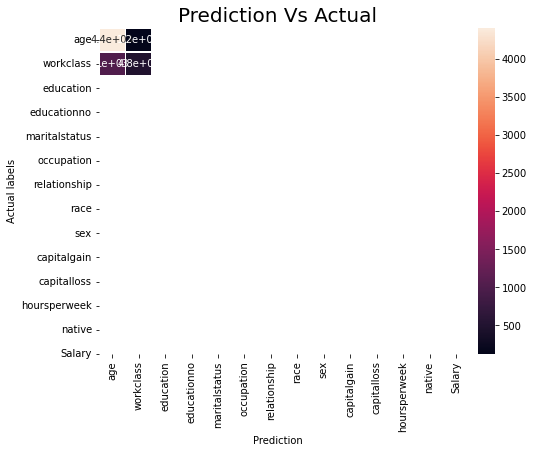

In [22]:
X_train,X_test,y_train,y_test = train_test_split(x_scaled,y,test_size = 0.20,random_state = 12,stratify = y)

svc_classifier = SVC(kernel='linear',)
svc_classifier.fit(X_train,y_train)
y_pred = svc_classifier.predict(X_test)

print("Overall Accuracy : ",round(accuracy_score(y_test,y_pred),4))
print("Precision        : ",round(precision_score(y_test,y_pred),4))
print("Recall           : ",round(recall_score(y_test,y_pred),4))
print("AUC Score        : ",round(roc_auc_score(y_test,y_pred),4))
print("Confusion Matrix :")
plt.figure(figsize = (8,6))
confu_matrix = confusion_matrix(y_test,y_pred)
sns.heatmap(data = confu_matrix,
            annot=True,
            linewidths=0.8,
            xticklabels=salary_data.columns,
            yticklabels=salary_data.columns,
            )
plt.xlabel("Prediction")
plt.ylabel("Actual labels")
plt.title("Prediction Vs Actual",size = 20)

# Kernek is Poly

Overall Accuracy :  0.7727
Precision        :  1.0
Recall           :  0.0872
AUC Score        :  0.5436
Confusion Matrix :


Text(0.5, 1.0, 'Prediction Vs Actual')

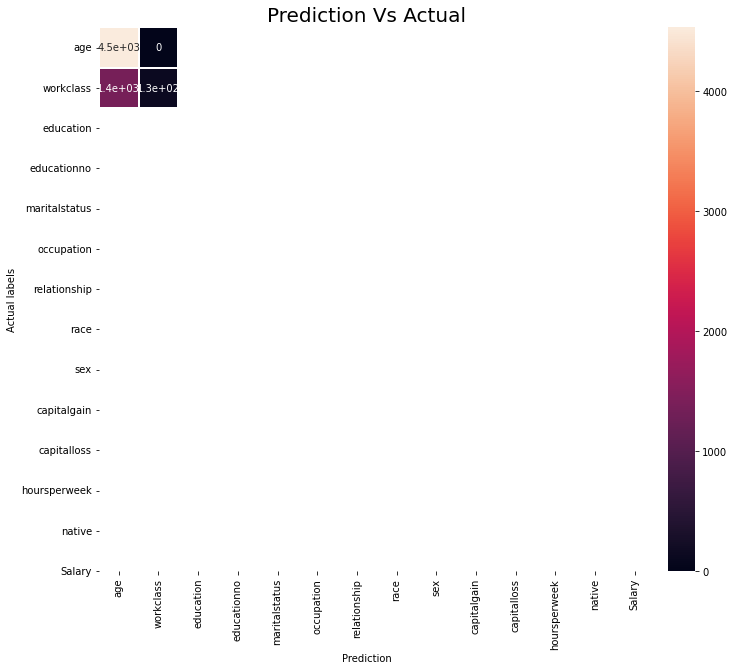

In [21]:
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size = 0.20,random_state = 12,stratify = y)

svc_classifier = SVC(kernel='poly')
svc_classifier.fit(x_train,y_train)
y_pred = svc_classifier.predict(x_test)

print("Overall Accuracy : ",round(accuracy_score(y_test,y_pred),4))
print("Precision        : ",round(precision_score(y_test,y_pred),4))
print("Recall           : ",round(recall_score(y_test,y_pred),4))
print("AUC Score        : ",round(roc_auc_score(y_test,y_pred),4))
print("Confusion Matrix :")

plt.figure(figsize = (12,10))
confu_matrix = confusion_matrix(y_test,y_pred)
sns.heatmap(data = confu_matrix,
            annot=True,
            linewidths=0.8,
            xticklabels=salary_data.columns,
            yticklabels=salary_data.columns,
            )
plt.xlabel("Prediction")
plt.ylabel("Actual labels")
plt.title("Prediction Vs Actual",size = 20)

# With Kernel = RBF

Overall Accuracy :  0.7968
Precision        :  0.7546
Recall           :  0.2723
AUC Score        :  0.6215
Confusion Matrix :


Text(0.5, 1.0, 'Prediction Vs Actual')

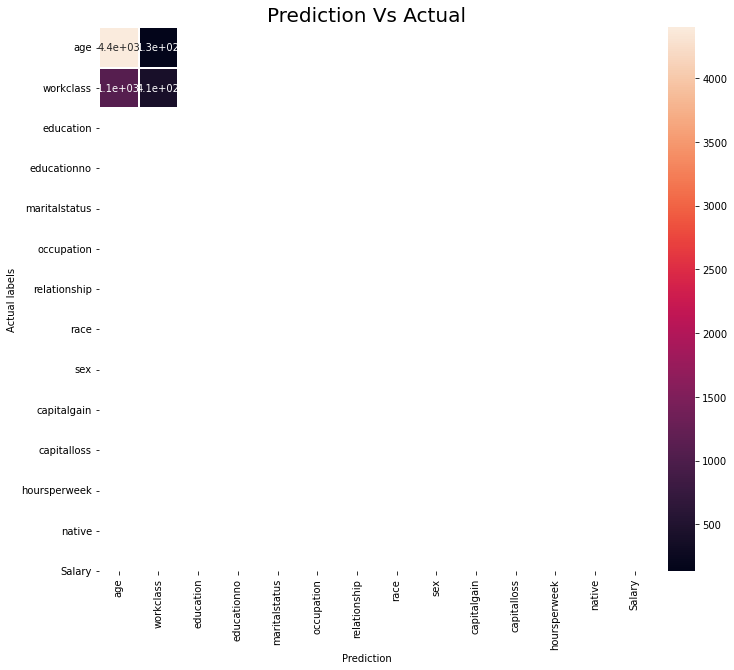

In [23]:
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size = 0.20,random_state = 12,stratify = y)

svc_classifier = SVC(kernel='rbf')
svc_classifier.fit(x_train,y_train)
y_pred = svc_classifier.predict(x_test)

print("Overall Accuracy : ",round(accuracy_score(y_test,y_pred),4))
print("Precision        : ",round(precision_score(y_test,y_pred),4))
print("Recall           : ",round(recall_score(y_test,y_pred),4))
print("AUC Score        : ",round(roc_auc_score(y_test,y_pred),4))
print("Confusion Matrix :")

plt.figure(figsize = (12,10))
confu_matrix = confusion_matrix(y_test,y_pred)
sns.heatmap(data = confu_matrix,
            annot=True,
            linewidths=0.8,
            xticklabels=salary_data.columns,
            yticklabels=salary_data.columns,
            )
plt.xlabel("Prediction")
plt.ylabel("Actual labels")
plt.title("Prediction Vs Actual",size = 20)

# For Test Data

In [31]:
salary1_data=pd.read_csv('SalaryData_Test(1).csv')

In [32]:
salary1_data['education']=le.fit_transform(salary1_data.education)
salary1_data['Salary']=le.fit_transform(salary1_data.Salary)
salary1_data['native']=le.fit_transform(salary1_data.native)
salary1_data['sex']=le.fit_transform(salary1_data.sex)
salary1_data['race']=le.fit_transform(salary1_data.race)
salary1_data['relationship']=le.fit_transform(salary1_data.relationship)
salary1_data['occupation']=le.fit_transform(salary1_data.occupation)
salary1_data['maritalstatus']=le.fit_transform(salary1_data.maritalstatus)
salary1_data['workclass']=le.fit_transform(salary1_data.workclass)

In [35]:
x1=salary1_data.drop({'Salary'},axis=1)
y1=salary1_data.Salary

In [38]:
scaler   = StandardScaler()
x_scaled1 = scaler.fit_transform(x1)
x_scaled1

array([[-1.02900513, -0.222347  , -2.42343884, ..., -0.2191694 ,
        -0.07888904,  0.26058067],
       [-0.05742253, -0.222347  ,  0.19017232, ..., -0.2191694 ,
         0.75013125,  0.26058067],
       [-0.80479376, -1.25712632, -0.85527215, ..., -0.2191694 ,
        -0.07888904,  0.26058067],
       ...,
       [-0.05742253, -0.222347  , -0.33254991, ..., -0.2191694 ,
         0.75013125,  0.26058067],
       [ 0.39100021, -0.222347  , -0.33254991, ..., -0.2191694 ,
        -0.07888904,  0.26058067],
       [-0.2816339 ,  0.81243231, -0.33254991, ..., -0.2191694 ,
         1.57915155,  0.26058067]])

In [42]:
x_train1,x_test1,y_train1,y_test1 = train_test_split(x1,y1,test_size = 0.20,random_state = 12,stratify = y)

In [44]:
x_train1.shape,y_train1.shape,x_test1.shape,y_test1.shape

((12048, 13), (12048,), (3012, 13), (3012,))

# Kernel= RBF
svc_classifier = SVC(kernel='rbf')
svc_classifier.fit(x_train1,y_train1)
y_pred = svc_classifier.predict(x_test1)

print("Overall Accuracy : ",round(accuracy_score(y_test1,y_pred),4))
print("Precision        : ",round(precision_score(y_test1,y_pred),4))
print("Recall           : ",round(recall_score(y_test1,y_pred),4))
print("AUC Score        : ",round(roc_auc_score(y_test1,y_pred),4))
print("Confusion Matrix :")

plt.figure(figsize = (12,10))
confu_matrix = confusion_matrix(y_test1,y_pred)
sns.heatmap(data = confu_matrix,
            annot=True,
            linewidths=0.8,
            xticklabels=salary1_data.columns,
            yticklabels=salary1_data.columns,
            )
plt.xlabel("Prediction")
plt.ylabel("Actual labels")
plt.title("Prediction Vs Actual",size = 20)

In [ ]:
svc_classifier = SVC(kernel='linear')
svc_classifier.fit(x_train1,y_train1)
y_pred = svc_classifier.predict(x_test1)

print("Overall Accuracy : ",round(accuracy_score(y_test1,y_pred),4))
print("Precision        : ",round(precision_score(y_test1,y_pred),4))
print("Recall           : ",round(recall_score(y_test1,y_pred),4))
print("AUC Score        : ",round(roc_auc_score(y_test1,y_pred),4))
print("Confusion Matrix :")

plt.figure(figsize = (12,10))
confu_matrix = confusion_matrix(y_test1,y_pred)
sns.heatmap(data = confu_matrix,
            annot=True,
            linewidths=0.8,
            xticklabels=salary1_data.columns,
            yticklabels=salary1_data.columns,
            )
plt.xlabel("Prediction")
plt.ylabel("Actual labels")
plt.title("Prediction Vs Actual",size = 20)